# 1. 获取数据

## 1.1 数据准备

In [2]:
import numpy as np
import pandas as pd

from datasets import fetch_housing_data, load_housing_data

house_data = load_housing_data()
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 1.2 数据展示

### 数据各个属性的直方图

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

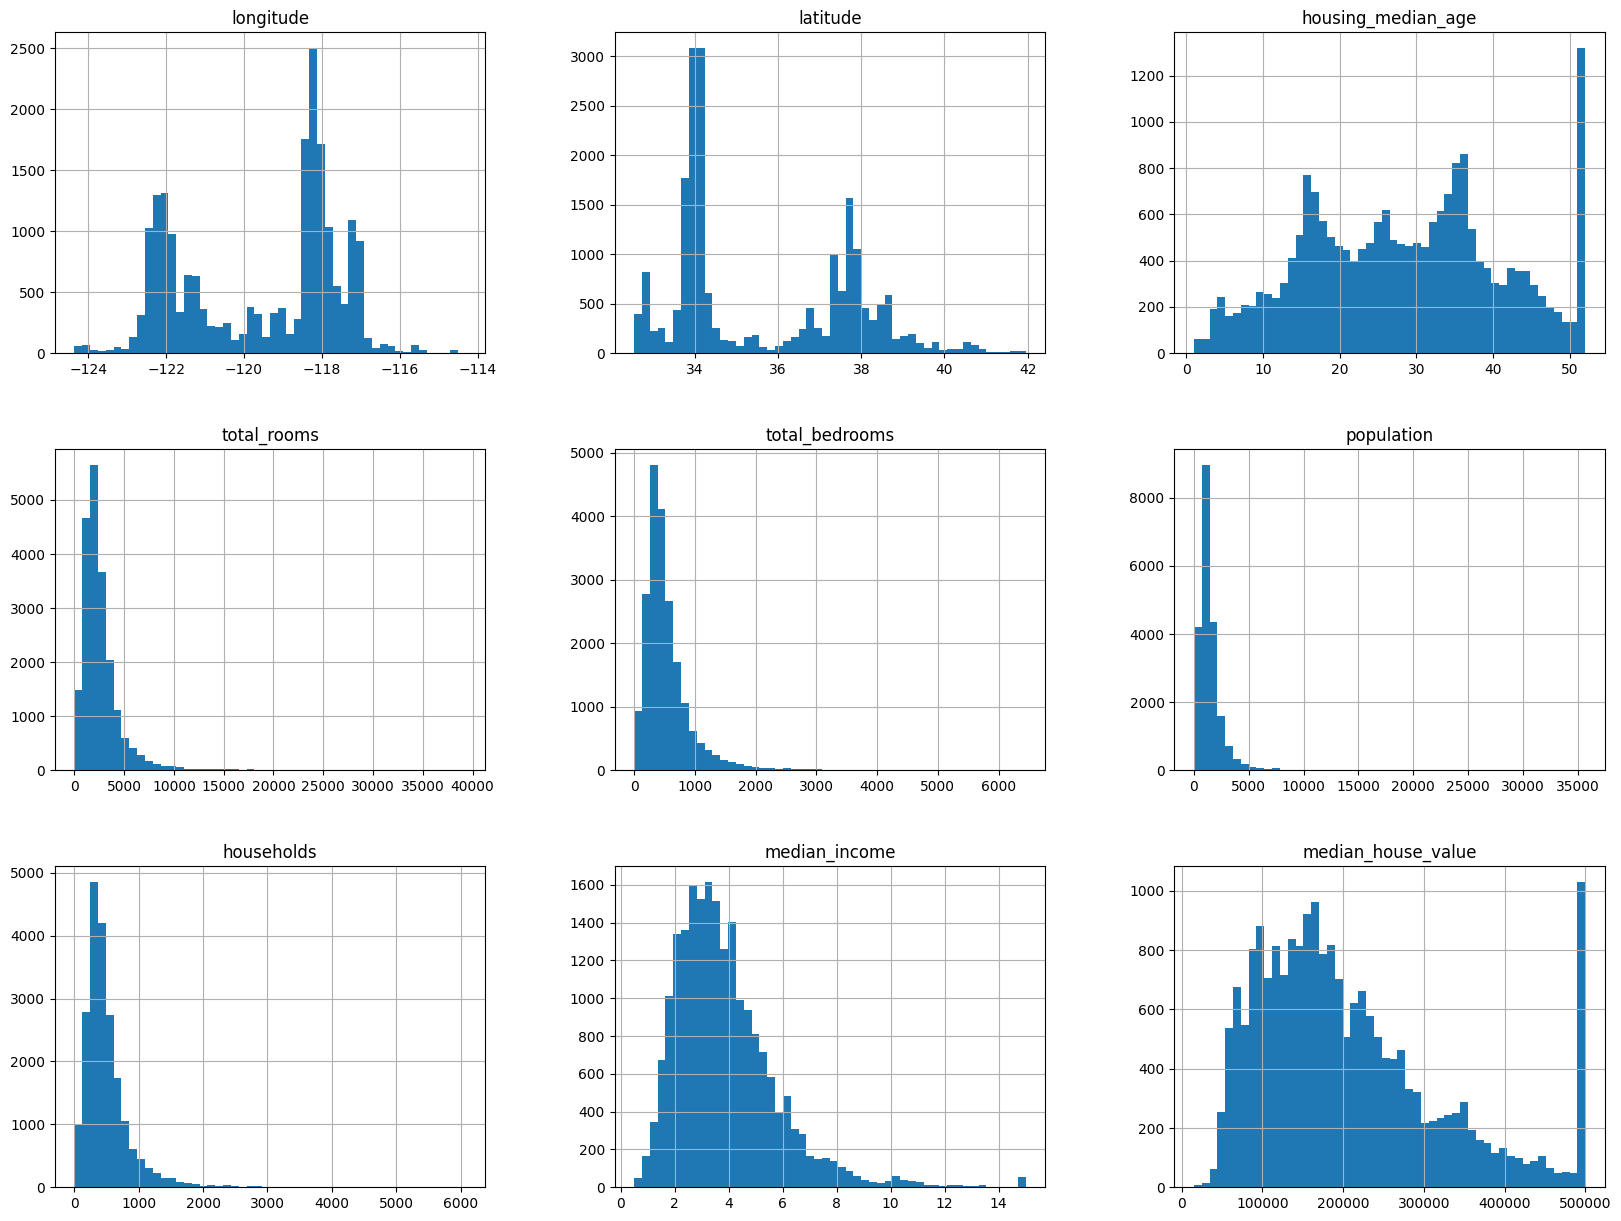

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

house_data.hist(bins=50, figsize=(20, 15))

### 属性分段直方图展示

<Axes: >

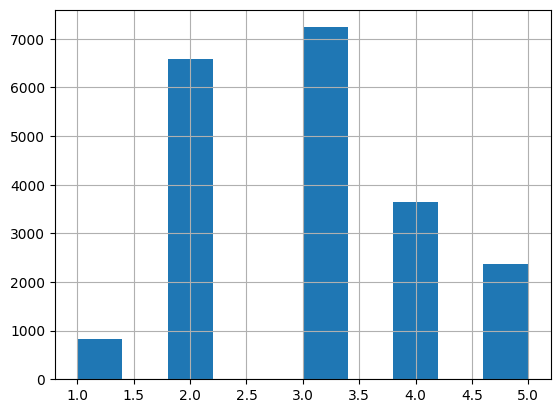

In [4]:
# 收入水平分段直方图
house_data['income_cat'] = pd.cut(house_data['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                  labels=[1, 2, 3, 4, 5])

house_data['income_cat'].hist()

# 2. 数据可视化
## 2.1 地理属性可视化

<Axes: xlabel='longitude', ylabel='latitude'>

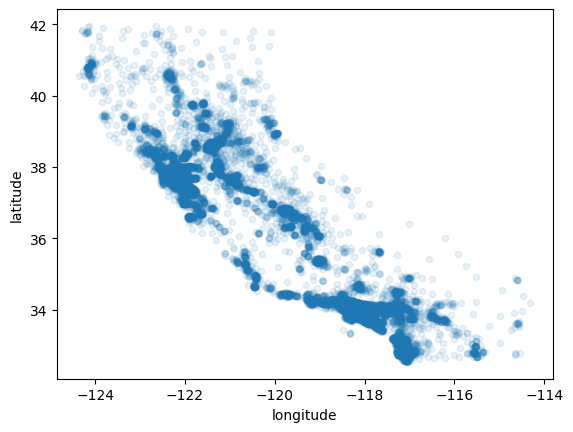

In [5]:
house_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

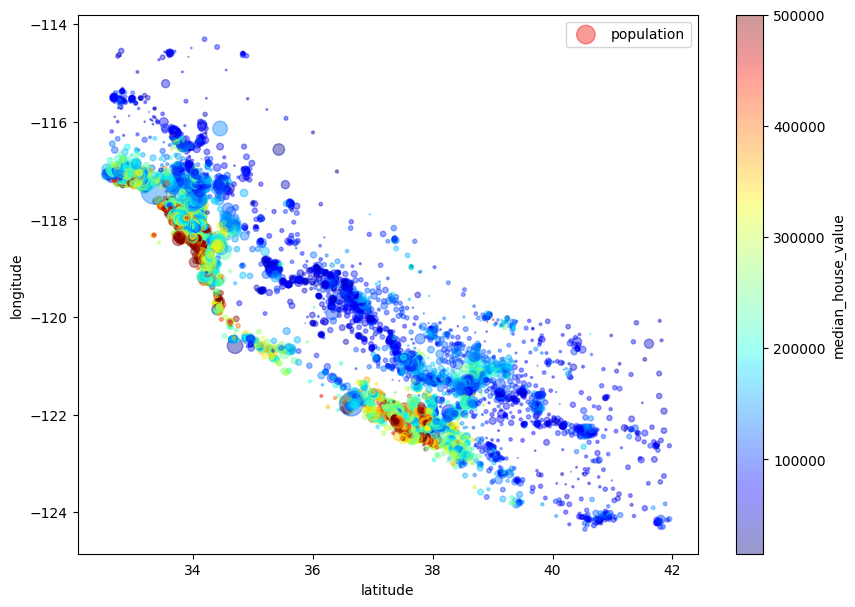

In [6]:
house_data.plot(kind='scatter', x='latitude', y='longitude', alpha=0.4,
                # 人口表示圈大小
                s=house_data['population'] / 100, label='population', figsize=(10, 7),
                # 房价代表颜色
                c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

## 2.2 属性的相关性

In [7]:
house_data_num = house_data.drop('ocean_proximity', axis=1)

house_data_num.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.010690
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.085528
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.146920
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.220528
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.015662
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.025809
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.038490
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.902750
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.643892
income_cat,-0.010690,-0.085528,-0.146920,0.220528,0.015662,0.025809,0.038490,0.902750,0.643892,1.000000


### 相关性矩阵

array([[<Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='population', ylabel='median_income'>],
       [<Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='population', ylabel='housing_median_age'>],
       [<Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='population', ylabel='median_house_value'>],
       [<Axes: xlabel='median_income', ylabel='population'>,
        <Axes: xlabel='housing_median_age', ylabel='population'>,
        <Axes: xlabel='median_house_value

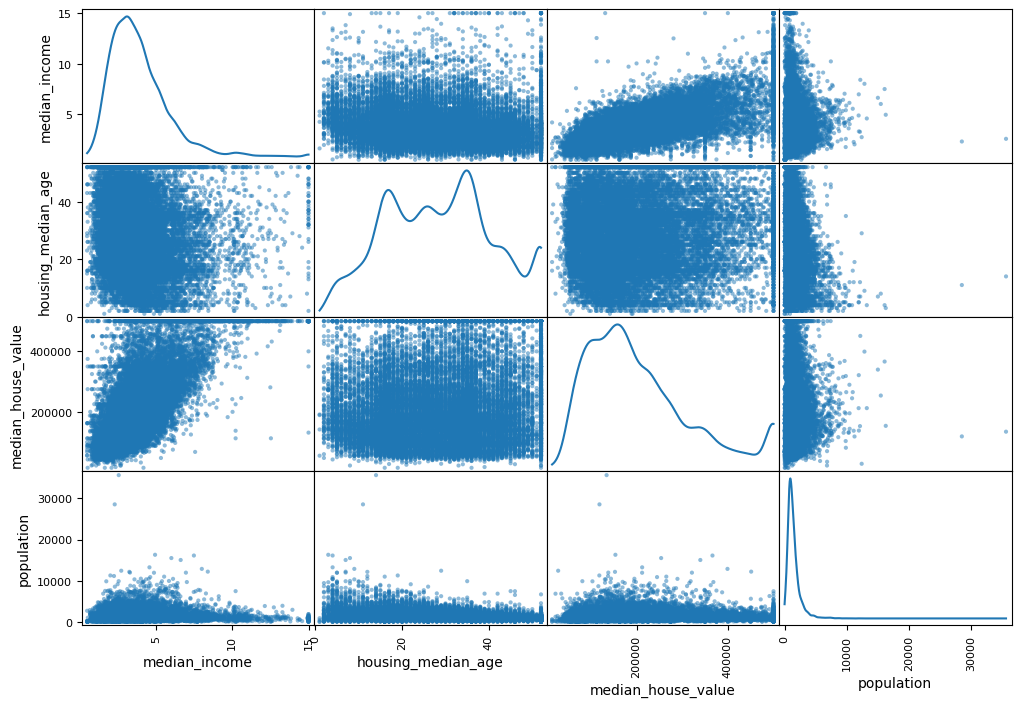

In [8]:
from pandas.plotting import scatter_matrix

attributes = ['median_income', 'housing_median_age', 'median_house_value', 'population']

# 相关性矩阵图
# 对角线显示每个属性的直方图(默认)
# diagonal 参数可以修改对象线展示的内容, kde: 折线图, hist 直方图
scatter_matrix(house_data[attributes], figsize=(12, 8), diagonal='kde')

<Axes: xlabel='median_income', ylabel='median_house_value'>

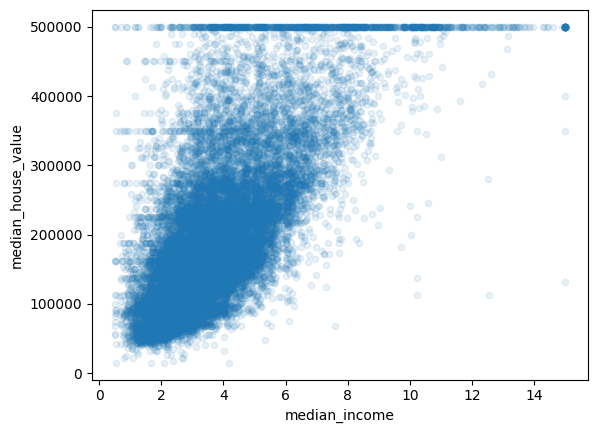

In [9]:
# 收入中位数与房价中位数

house_data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

# 3. 机器学习算法的数据准备

## 3.1 数据清洗

pandas 的 ```dropna()```, ```drop()```, ```fillna()```等函数可以简单对数据进行清理。

sk-learn 提供了非常容易的类来处理缺失值:

In [10]:
from sklearn.impute import SimpleImputer

# 清洗策略：使用中位数
imputer = SimpleImputer(strategy='median')

imputer.fit(house_data_num)
# 清洗
X = imputer.transform(house_data_num)

# 转换为 DataFrame
house_data_tr = pd.DataFrame(X, columns=house_data_num.columns, index=house_data_num.index)
house_data_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.0


## 3.2 处理文本和分类属性

In [11]:
house_data[['ocean_proximity']].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

机器学习处理的大部分都是数字，可以将这种枚举的分类转换为数字：
使用 sk-learn OrdinalEncoder 类就可以轻松做到。

In [12]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
house_ocean_proximity = house_data[['ocean_proximity']]
house_cat_encoded = pd.DataFrame(ordinal_encoder.fit_transform(house_ocean_proximity),
                                 columns=['ocean_proximity_encoded'])
house_data['ocean_proximity_encoded'] = house_cat_encoded

house_data['ocean_proximity_encoded'].value_counts()

ocean_proximity_encoded
0.0    9136
1.0    6551
4.0    2658
3.0    2290
2.0       5
Name: count, dtype: int64

In [13]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 独热向量


In [14]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse._csr import csr_matrix

one_hot_encoder = OneHotEncoder()

# 返回值是一个稀疏矩阵
house_cat_1hot = one_hot_encoder.fit_transform(house_ocean_proximity)  # type: csr_matrix

house_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [15]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 3.3 自定义转换器

实现 ```fit()```、```transform()``` 和 ```fit_transform()```三个函数即可。

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin


rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

combined_attributes_adder = CombinedAttributesAdder()

combined_attributes_adder.transform(house_data.values)

array([[-122.23, 37.88, 41.0, ..., 6.984126984126984, 2.5555555555555554,
        0.14659090909090908],
       [-122.22, 37.86, 21.0, ..., 6.238137082601054, 2.109841827768014,
        0.15579659106916466],
       [-122.24, 37.85, 52.0, ..., 8.288135593220339, 2.8022598870056497,
        0.12951601908657123],
       ...,
       [-121.22, 39.43, 17.0, ..., 5.20554272517321, 2.325635103926097,
        0.21517302573203195],
       [-121.32, 39.43, 18.0, ..., 5.329512893982808, 2.1232091690544412,
        0.21989247311827956],
       [-121.24, 39.37, 16.0, ..., 5.254716981132075, 2.616981132075472,
        0.22118491921005387]], dtype=object)

## 3.4 转换流水线

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('attribs_adder', CombinedAttributesAdder()),
                ('std_scaler', StandardScaler())])

In [18]:
from sklearn.compose import ColumnTransformer

num_attribs = list(house_data_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'median_house_value', 'income_cat']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

In [19]:
labels = list(house_data_num)

labels = labels + ['rooms_per_household', 'population_per_household', 'bedrooms_per_room', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

prepared_data = pd.DataFrame(full_pipeline.fit_transform(house_data), columns=labels)

full_house_data = prepared_data

prepared_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,1.890128,0.628559,-0.049597,-1.029988,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,1.890128,0.327041,-0.092512,-0.888897,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.890128,1.155620,-0.025843,-1.291686,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.941894,0.156966,-0.050329,-0.449613,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,-0.006340,0.344711,-0.085616,-0.639087,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.115804,-0.954574,-0.155023,-0.049110,0.165994,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.124470,-0.954574,0.276881,0.005021,0.021671,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-0.992746,-0.954574,-0.090318,-0.071735,0.021134,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.058608,-0.954574,-0.040211,-0.091225,0.093467,0.0,1.0,0.0,0.0,0.0


# 4. 选择和训练模型

## 4.1 创建测试集

In [20]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

train_set, test_set = train_test_split(house_data, test_size=0.2, random_state=42)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

strat_train_set = train_set
strat_test_set = test_set

for train_index, test_index in split.split(prepared_data, prepared_data['income_cat']):
    strat_train_set = prepared_data.loc[train_index]
    strat_test_set = prepared_data.loc[test_index]

strat_train_set['income_cat'].value_counts()


income_cat
-0.006340    5789
-0.954574    5265
 0.941894    2911
 1.890128    1890
-1.902808     657
Name: count, dtype: int64

In [21]:
X = strat_train_set.drop("median_house_value", axis=1)
y = strat_train_set['median_house_value'].copy()

test_X = strat_test_set.drop('median_house_value', axis=1)
test_y = strat_test_set['median_house_value'].copy()

## 4.2 训练和评估训练集

```mean_squared_error``` 可以用来测量整个训练集上的 RMSE（均方根误差）。

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(X, y)

house_predictions = lin_reg.predict(X)

mean_squared_error(y, house_predictions)

0.35124496636587005

使用决策树回归，会产生过拟合。

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X, y)

house_predictions = tree_reg.predict(X)

tree_mse = mean_squared_error(y, house_predictions)
np.sqrt(tree_mse)

3.821312693005246e-16

In [24]:
tree_reg.score(test_X, test_y)

0.6185946077724602

## 4.3 使用交叉验证集来更好的评估

K-折交叉验证。

In [25]:
from sklearn.model_selection import cross_val_score

full_house_prepared = house_data_tr.drop(['median_house_value'], axis=1)
full_house_labels = house_data_tr['median_house_value'].copy()

scores = cross_val_score(tree_reg, full_house_prepared, full_house_labels, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)


def display_scores(scores: np.ndarray):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")


display_scores(tree_rmse_scores)

Scores: [127923.39443502  90773.39458333  88930.51933588  75902.79272049
  89069.91479504  99212.33513195  71763.40548009 103140.74645701
 108205.29262205  74764.45514301]
Mean: 92968.6250703882
Standard deviation: 16447.09384447455


In [26]:
line_scores = cross_val_score(lin_reg, full_house_prepared, full_house_labels, scoring='neg_mean_squared_error', cv=10)

line_scores_rmse = np.sqrt(-line_scores)
display_scores(line_scores_rmse)

Scores: [67160.6598018  63776.68181606 87901.72040674 57757.480031
 81083.28172188 71666.56105824 54387.84388015 86298.74265425
 77265.15773584 56152.95405704]
Mean: 70345.10831630108
Standard deviation: 11813.042037394172


保存模型到文件：

In [27]:
import joblib

# joblib.dump(my_model, "my_model.pkl")

# 4. 微调模型

## 4.1 网格搜索

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # bootstrap, n_estimators 和 max_features 是 RandomForestRegressor 的模型参数
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

# 5-折训练，一个验证，四个训练
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(full_house_data, full_house_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [30]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [34]:
cv_rets = grid_search.cv_results_
for mean_score, params in zip(cv_rets['mean_test_score'], cv_rets['params']):
    print(f"{params}: {np.sqrt(-mean_score)}")

{'max_features': 2, 'n_estimators': 3}: 36460.825922029195
{'max_features': 2, 'n_estimators': 10}: 33672.83910981094
{'max_features': 2, 'n_estimators': 30}: 30125.955326089737
{'max_features': 4, 'n_estimators': 3}: 28414.486635724377
{'max_features': 4, 'n_estimators': 10}: 19085.950790163206
{'max_features': 4, 'n_estimators': 30}: 15453.921931018293
{'max_features': 6, 'n_estimators': 3}: 14929.774047640436
{'max_features': 6, 'n_estimators': 10}: 8669.48470337259
{'max_features': 6, 'n_estimators': 30}: 7143.468287322725
{'max_features': 8, 'n_estimators': 3}: 12011.3879585807
{'max_features': 8, 'n_estimators': 10}: 5587.686781043949
{'max_features': 8, 'n_estimators': 30}: 4290.412283518569
{'bootstrap': False, 'max_features': 2, 'n_estimators': 3}: 40691.47892042286
{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}: 35225.19166926722
{'bootstrap': False, 'max_features': 3, 'n_estimators': 3}: 31236.049569526745
{'bootstrap': False, 'max_features': 3, 'n_estimators': 

## 4.2 随机搜索

In [36]:
from sklearn.model_selection import RandomizedSearchCV

rs_cv = RandomizedSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

rs_cv.fit(full_house_data, full_house_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
rs_cv.best_params_

{'n_estimators': 30, 'max_features': 8}

## 4.3 分析最佳模型及其误差

In [42]:
sorted(zip(rs_cv.best_estimator_.feature_importances_, full_house_data.columns), reverse=True)

[(0.6692246195462993, 'median_house_value'),
 (0.11436285749064949, 'median_income'),
 (0.07745749443042992, 'income_cat'),
 (0.07427132977198651, 'INLAND'),
 (0.01998711254424433, 'rooms_per_household'),
 (0.01830185223542658, 'population_per_household'),
 (0.007666701306683957, 'bedrooms_per_room'),
 (0.005904722610368197, 'latitude'),
 (0.0036849797800452225, 'longitude'),
 (0.0033143758097241237, 'housing_median_age'),
 (0.0024375519835892682, '<1H OCEAN'),
 (0.0008862526810672641, 'population'),
 (0.0007877167478000148, 'total_bedrooms'),
 (0.0006858405528903437, 'total_rooms'),
 (0.0006610926407409389, 'households'),
 (0.00030431378411084446, 'NEAR OCEAN'),
 (6.057002137595145e-05, 'NEAR BAY'),
 (6.160625677300434e-07, 'ISLAND')]